# Lya Quasar Weighting

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.table

## Quasar Value

Read quasar values $V(r, z)$ tabulated on a grid of r-mag and redshift. For details see [here](https://desi.lbl.gov/trac/wiki/ValueQSO):

In [3]:
def load_weights():

    table = astropy.table.Table.read('quasarvalue.txt', format='ascii')
    z_col, r_col, w_col = table.columns[0], table.columns[1], table.columns[2]

    z_vec = np.unique(z_col)
    z_edges = np.linspace(2.025, 4.025, len(z_vec) + 1)
    assert np.allclose(z_vec, 0.5 * (z_edges[1:] + z_edges[:-1]))

    r_vec = np.unique(r_col)
    r_edges = np.linspace(18.05, 23.05, len(r_vec) + 1)
    assert np.allclose(r_vec, 0.5 * (r_edges[1:] + r_edges[:-1]))
    
    W = np.empty((len(r_vec), len(z_vec)))
    k = 0
    for j in range(len(z_vec)):
        for i in range(len(r_vec))[::-1]:
            assert r_col[k] == r_vec[i]
            assert z_col[k] == z_vec[j]
            W[i, j] = w_col[k]
            k += 1
    return W, r_edges, r_vec, z_edges, z_vec
    
W, r_edges, r_vec, z_edges, z_vec = load_weights()

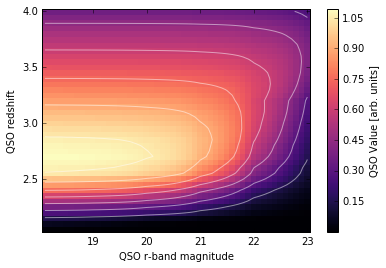

In [4]:
def plot_weights(W=W):
    plt.pcolormesh(r_edges, z_edges, W.T, cmap='magma')
    plt.colorbar().set_label('QSO Value [arb. units]')
    plt.contour(r_vec, z_vec, W.T, colors='w', alpha=0.5)
    plt.xlabel('QSO r-band magnitude')
    plt.ylabel('QSO redshift')

plot_weights()

## Quasar Luminosity Function Prior

Copied from [this notebook](https://github.com/dkirkby/ArgonneLymanAlpha/blob/master/notebooks/SampleProperties.ipynb):

In [9]:
table2015a = np.array([
    15.75, 30, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    16.25, 60, 8, 4, 5, 5, 4, 4, 4, 4, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    16.75, 117, 29, 17, 19, 18, 17, 16, 16, 15, 12, 8, 6, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    17.25, 216, 101, 62, 70, 69, 64, 61, 62, 59, 45, 32, 22, 13, 7, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    17.75, 358, 312, 224, 255, 253, 235, 227, 231, 224, 171, 121, 82, 47, 25, 13, 7, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    18.25, 525, 788, 722, 855, 869, 819, 803, 824, 811, 630, 452, 309, 171, 88, 46, 22, 9, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    18.75, 703, 1563, 1890, 2393, 2544, 2493, 2507, 2612, 2622, 2112, 1572, 1096, 603, 309, 157, 76, 28, 8, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    19.25, 898, 2490, 3740, 5086, 5758, 5971, 6214, 6580, 6745, 5779, 4613, 3369, 1913, 1004, 516, 249, 93, 26, 10, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    19.75, 1125, 3445, 5827, 8319, 9913, 10805, 11590, 12422, 12937, 11839, 10261, 8011, 4902, 2771, 1499, 753, 289, 78, 31, 12, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    20.25, 1399, 4456, 7930, 11585, 14183, 15895, 17350, 18718, 19660, 18783, 17275, 14270, 9517, 5936, 3513, 1919, 804, 228, 91, 34, 10, 2, 1, 0, 0, 0, 0, 0, 0, 0,
    20.75, 1734, 5616, 10195, 15029, 18589, 21065, 23176, 25094, 26479, 25795, 24410, 20801, 14695, 9899, 6391, 3856, 1851, 599, 248, 94, 27, 6, 1, 1, 0, 0, 0, 0, 0, 0,
    21.25, 2141, 7016, 12842, 18997, 23563, 26793, 29584, 32124, 34027, 33395, 31948, 27600, 20026, 14047, 9572, 6217, 3399, 1325, 598, 241, 73, 17, 4, 1, 1, 1, 0, 0, 0, 0,
    21.75, 2631, 8738, 16067, 23807, 29528, 33591, 37170, 40481, 43047, 42378, 40701, 35383, 25928, 18498, 12931, 8731, 5198, 2395, 1211, 541, 182, 45, 10, 3, 2, 2, 1, 1, 0, 0,
    22.25, 3211, 10871, 20058, 29754, 36864, 41912, 46457, 50760, 54210, 53457, 51424, 44870, 32982, 23683, 16738, 11500, 7140, 3651, 2036, 1022, 394, 110, 25, 8, 6, 4, 2, 2, 1, 1,
    22.75, 3875, 13520, 25026, 37157, 45968, 52212, 57971, 63564, 68202, 67344, 64840, 56742, 41732, 30041, 21339, 14774, 9334, 5003, 2969, 1636, 730, 239, 60, 21, 13, 8, 5, 3, 2, 1,
    23.25, 4591, 16812, 31220, 46395, 57302, 65011, 72306, 79586, 85821, 84853, 81750, 71739, 52744, 38010, 27078, 18823, 11969, 6500, 3980, 2322, 1159, 450, 133, 48, 30, 19, 12, 7, 5, 3,
    23.75, 5270, 20905, 38950, 57934, 71426, 80937, 90180, 99667, 108052, 106983, 103130, 90753, 66677, 48080, 34331, 23929, 15247, 8253, 5120, 3076, 1645, 733, 256, 102, 63, 39, 24, 15, 9, 6,
    24.25, 5713, 25993, 48598, 72353, 89037, 100762, 112480, 124858, 136130, 134989, 130200, 114903, 84351, 60850, 43543, 30420, 19392, 10379, 6468, 3939, 2184, 1061, 432, 192, 119, 73, 45, 27, 17, 10,
    24.75, 5464, 32318, 60643, 90374, 110997, 125444, 140309, 156474, 171625, 170467, 164509, 145614, 106798, 77072, 55275, 38702, 24667, 13006, 8110, 4969, 2803, 1428, 648, 317, 199, 123, 76, 46, 28, 17
    ]).reshape(19, 31)

In [10]:
table2015b = np.array([
    15.75, 23, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    16.25, 49, 4, 2, 2, 2, 2, 2, 2, 2, 1, 1, 16, 10, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    16.75, 99, 16, 8, 10, 10, 9, 9, 8, 8, 5, 3, 40, 25, 12, 6, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    17.25, 190, 69, 38, 44, 45, 41, 39, 39, 36, 24, 15, 104, 65, 32, 15, 7, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    17.75, 326, 248, 165, 196, 199, 185, 177, 176, 163, 113, 69, 268, 167, 82, 39, 17, 6, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    18.25, 488, 699, 628, 775, 805, 763, 744, 751, 709, 501, 314, 679, 422, 211, 102, 46, 16, 5, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    18.75, 664, 1453, 1808, 2389, 2615, 2602, 2624, 2702, 2629, 1968, 1308, 1650, 1027, 532, 262, 119, 42, 12, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    19.25, 866, 2337, 3638, 5131, 5991, 6356, 6674, 7031, 7076, 5840, 4349, 3696, 2334, 1283, 657, 307, 111, 30, 11, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    19.75, 1113, 3252, 5609, 8203, 9995, 11093, 11997, 12825, 13218, 11932, 10033, 7168, 4740, 2850, 1566, 769, 288, 77, 27, 9, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,
    20.25, 1423, 4274, 7646, 11336, 14053, 15897, 17425, 18758, 19553, 18488, 16711, 11689, 8346, 5597, 3399, 1817, 723, 195, 70, 23, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0 ,
    20.75, 1814, 5517, 9994, 14889, 18542, 21093, 23243, 25116, 26334, 25315, 23523, 16660, 12773, 9487, 6456, 3873, 1709, 482, 177, 58, 15, 3, 1, 0, 0, 0, 0, 0, 0, 0 ,
    21.25, 2303, 7084, 12906, 19262, 23994, 27320, 30181, 32721, 34466, 33311, 31222, 21941, 17567, 14054, 10566, 7166, 3647, 1143, 436, 148, 38, 7, 1, 0, 0, 0, 0, 0, 0, 0 ,
    21.75, 2911, 9082, 16610, 24818, 30879, 35139, 38892, 42310, 44774, 43370, 40764, 27761, 22625, 18918, 15230, 11423, 6772, 2503, 1034, 367, 96, 19, 3, 1, 0, 0, 0, 0, 0, 0 ,
    22.25, 3652, 11639, 21358, 31945, 39682, 45108, 50015, 54614, 58082, 56344, 53020, 34486, 28144, 24081, 20162, 16146, 10868, 4879, 2277, 876, 241, 49, 9, 2, 1, 1, 0, 0, 0, 0 ,
    22.75, 4527, 14913, 27461, 41112, 50977, 57875, 64289, 70486, 75363, 73207, 68942, 42521, 34433, 29793, 25456, 21136, 15480, 8290, 4489, 1955, 585, 122, 22, 5, 3, 1, 1, 0, 0, 0 ,
    23.25, 5504, 19106, 35311, 52915, 65485, 74247, 82634, 90995, 97849, 95188, 89701, 52304, 41818, 36375, 31400, 26555, 20387, 12378, 7728, 3931, 1345, 302, 55, 14, 7, 3, 2, 1, 0, 0,
    23.75, 6479, 24477, 45409, 68119, 84128, 95249, 106225, 117520, 127141, 123880, 116812, 64335, 50637, 44159, 38330, 32717, 25709, 16775, 11668, 6924, 2830, 719, 137, 35, 18, 9, 4, 2, 1, 0 ,
    24.25, 7195, 31358, 58404, 87705, 108088, 122196, 136567, 151843, 165336, 161372, 152261, 79215, 61261, 53494, 46590, 39969, 31740, 21404, 15927, 10682, 5278, 1609, 337, 89, 45, 22, 11, 5, 3, 1,
    24.75, 7043, 40171, 75127, 112945, 138885, 156770, 175600, 196278, 215178, 210413, 198658, 97685, 74113, 64767, 56549, 48670, 38821, 26430, 20396, 14815, 8615, 3269, 793, 220, 112, 56, 28, 13, 6, 3
    ]).reshape(19, 31)

In [17]:
def bin_index(bin_centers, low_edge):
    """Find the index of the bin with the specified low edge, where bins is an array of equally-spaced bin centers.
    """
    delta = bin_centers[1] - bin_centers[0]
    min_value = bin_centers[0] - 0.5 * delta
    index = int(round((low_edge - min_value) / delta))
    if abs((low_edge - min_value) / delta - index) > 1e-5:
        raise ValueError('low_edge = {} is not aligned with specified bins.'.format(low_edge))
    return index

In [11]:
def luminosity_function(data, z_max=6.0, area_sq_deg=10000.):
    """Transform a data array from Nathalie into a tuple gbin, zbin, nqso.
    """
    ng, nz = data.shape
    # g-band magnitude bin centers are in the first column.
    gbin = data[:, 0]
    nz = nz - 1
    # Check that g-band bins are equally spaced.
    assert np.allclose(np.diff(gbin),  gbin[1] - gbin[0])
    # redshift bins are equally spaced from 0 up to z_max.
    zbin = z_max * (0.5 + np.arange(nz)) / nz
    # The remaining columns give predicted numbers of QSO in a 10,000 sq.deg. sample.
    # Normalize to densisities per sq.deg.
    nqso = data[:, 1:].reshape((ng, nz)) / area_sq_deg
    return gbin, zbin, nqso

In [15]:
lumi_table = luminosity_function(0.5 * (table2015a + table2015b))

In [100]:
def lumi_plot(magbin, zbin, nqso, mag_min=18, mag_max=23, z_min=1, z_max=4):
    z_min_cut = bin_index(zbin, z_min)
    z_max_cut = bin_index(zbin, z_max)
    mag_min_cut = bin_index(magbin, mag_min)
    mag_max_cut = bin_index(magbin, mag_max)
    #
    plt.figure(figsize=(8,5))
    plt.imshow(nqso[mag_min_cut:mag_max_cut, z_min_cut:z_max_cut].T,
               origin='lower', interpolation='bicubic', cmap='magma',
               aspect='auto', extent=(mag_min, mag_max, z_min, z_max))
    plt.ylim(z_min, z_max)
    plt.xlim(mag_min, mag_max)
    plt.ylabel('QSO redshift')
    plt.xlabel('QSO g~r magnitude')
    plt.colorbar().set_label(
        'N(z) / sq.deg. / $(\Delta z = {:.1f})$ / $(\Delta g = {:.1f})$'
        .format(zbin[1] - zbin[0], magbin[1] - magbin[0]))
    plt.contour(r_vec, z_vec, W.T, colors='w', alpha=0.5)
    #plt.grid(c='w')

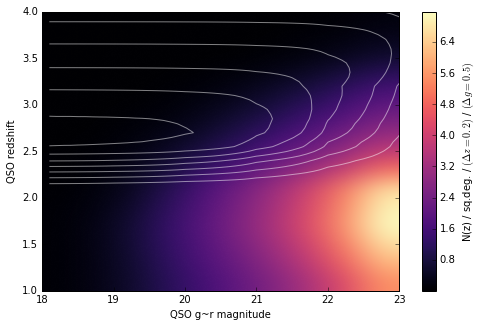

In [101]:
lumi_plot(*lumi_table)

## Binning

Rebin weights to the redshift ranges of neural network output categories:

Given probability density $p(z|T)$ for a target $T$ to be a quasar at redshift $z$, calculate the "value" of re-observing $T$ as:
$$
t(r, z) = \int dz\, p(z|T, r) V(r, z)
$$
Write:
$$
p(z|T, r) = \frac{P(T|z) P(z, r)}{P(T)}
$$

In [5]:
def rebin_weights(new_z_edges=[2.0, 2.5, 3.0, 4.0]):
    n_z = len(new_z_edges) - 1
    W2 = np.empty((len(r_vec), n_z))
    for i in range(len(r_vec)):
        W2[i] = np.histogram(z_vec, bins=new_z_edges, weights=W[i])[0]
    return W2, new_z_edges
    
W2, new_z_edges = rebin_weights()

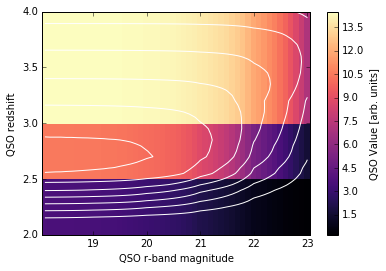

In [6]:
def plot_reweights():
    plt.pcolormesh(r_edges, new_z_edges, W2.T, cmap='magma')
    plt.colorbar().set_label('QSO Value [arb. units]')
    plt.contour(r_vec, z_vec, W.T, colors='w', alpha=1)
    plt.xlabel('QSO r-band magnitude')
    plt.ylabel('QSO redshift')

plot_reweights()

Calculate overall values for a quasar target based on its absolute probabilities of being a quasar in different redshift bins:

In [7]:
def get_values(r_mag, z_prob):
    
    r_mag = np.asarray(r_mag)
    z_prob = np.asarray(z_prob)
    
    assert np.all((r_edges[0] <= r_mag) & (r_mag < r_edges[-1]))
    assert z_prob.shape[-1] == len(new_z_edges) - 1
    assert z_prob.shape[:-1] == r_mag.shape
    assert np.all(z_prob.sum(axis=-1) <= 1.)

    r_index = np.digitize(r_mag, r_edges)
    
    return (W2[r_index] * z_prob).sum(axis=-1)

In [8]:
get_values([19, 19, 19], [[1,0,0],[0,1,0],[0,0,1]])

array([  3.478114,  10.4375  ,  14.4807  ])

## Neural Network Results

In [62]:
def get_nn():
    t = astropy.table.Table.read('quassifier_results_dense_prob.fits', hdu=1)
    print t.colnames
    print t['Prob'].shape
    return t
    
nn = get_nn()

['TARGETID', 'MAG', 'Prob']
(4000, 5)


In [97]:
def plot_nn(i=8, save=None):
    x = np.arange(5)
    bins = np.linspace(-0.5, 4.5, 6)
    plt.hist(x, bins=bins, weights=nn['Prob'][i], histtype='stepfilled', color='r')
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('Relative Probability')
    plt.gca().set_xticklabels(['', 'ELG', 'Galaxy', 'LyaQSO', 'TracerQSO', 'Star'])
    plt.xlim(bins[0], bins[-1])
    plt.tight_layout()
    if save:
        plt.savefig(save)

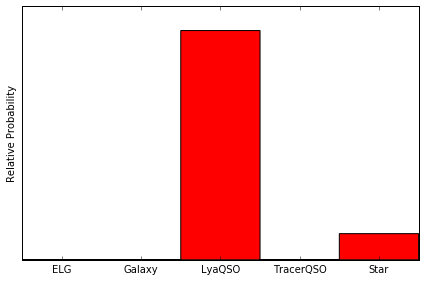

In [99]:
plot_nn(0, 'lyaprob.pdf')

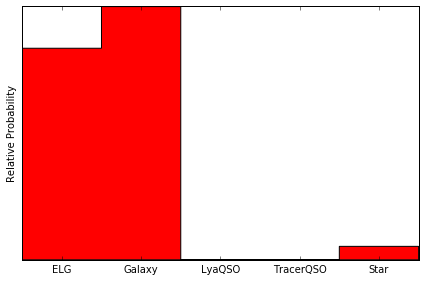

In [98]:
plot_nn(1, 'bgprob.pdf')